In [1]:
import cv2 
import numpy as np
import math
from matplotlib import pyplot as plt
img = cv2.imread('lena.bmp', 0)
def imshow(img):
    plt.imshow(img, cmap='Greys_r',vmin = 0, vmax = 255)
    plt.show()
def padding(img, size):# padding each edge with size//2
    img_padding = np.zeros(( len(img)+ size - 1, len(img[0]) + size - 1), dtype = np.int)
    for i in range(len(img)):
        for j in range(len(img[0])):
            img_padding[i+size//2][j+size//2] = img[i][j]
    return img_padding

In [2]:
def useMask(img, mask, threshold):
    img_padding = padding(img, len(mask))
    img_mask = np.zeros([len(img), len(img[0])],dtype=np.int8)
    for i in range(len(img_mask)):
        for j in range(len(img_mask[0])):
            tmp = 0
            for ki in range(len(mask)):
                for kj in range(len(mask[0])):
                    tmp += mask[ki][kj] * img_padding[i + ki][j + kj]
            if tmp >= threshold:
                img_mask[i][j] = 1
            elif tmp <= (-1)*threshold:
                img_mask[i][j] = -1
            else:
                img_mask[i][j] = 0
    return img_mask

In [3]:
def Zero_Crossing_Edge_Detectors(img, threshold):
    img_padding = padding(img, 3)
    img_result = np.zeros([len(img), len(img[0])],dtype=np.uint8)
    for i in range(len(img_result)):
        for j in range(len(img_result[0])):
            img_result[i][j] = 255
            if img[i][j] >= threshold:
                for ki in range(3):
                    for kj in range(3):
                        if img_padding[i + ki][j + kj] <= (-1)*threshold:
                            img_result[i][j] = 0
            '''
            elif img[i][j] <= (-1)*threshold:
                for ki in range(3):
                    for kj in range(3):
                        if img_padding[i + ki][j + kj] >= threshold:
                            img_result[i][j] = 0
            '''
    return img_result

In [4]:
Laplacian_mask1 = np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
        ])
Laplacian_mask2 = np.array([
            [1/3, 1/3, 1/3],
            [1/3, -8/3, 1/3],
            [1/3, 1/3, 1/3]
        ])

In [5]:
'''
test = [[105, 97, 97, 97, 103], [123, 117, 115, 145, 86], [129, 110, 114, 107, 113], [128, 130, 134, 139, 129], [167, 142, 183, 168, 110]]
print(useMask(test, Laplacian_mask1, 15))
print(Zero_Crossing_Edge_Detectors(useMask(test, Laplacian_mask1, 15), 1))
'''

'\ntest = [[105, 97, 97, 97, 103], [123, 117, 115, 145, 86], [129, 110, 114, 107, 113], [128, 130, 134, 139, 129], [167, 142, 183, 168, 110]]\nprint(useMask(test, Laplacian_mask1, 15))\nprint(Zero_Crossing_Edge_Detectors(useMask(test, Laplacian_mask1, 15), 1))\n'

In [6]:
#minimum_variance_Laplacian
mvL = np.array([
                [2/3,  -1/3,  2/3],
                [-1/3, -4/3, -1/3],
                [2/3,  -1/3,  2/3]
            ])
#Laplacian of Gaussian
LoG = np.array([
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]
        ])
#Difference of Gaussian
DoG =  np.array([
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
        ])

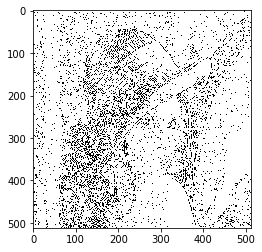

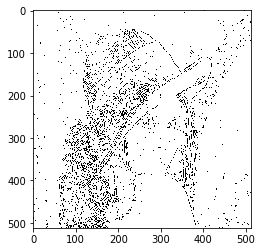

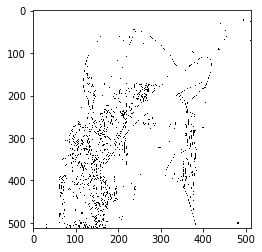

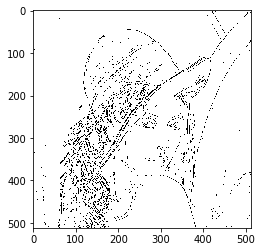

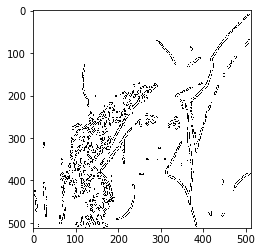

True

In [7]:
img_lap1 = Zero_Crossing_Edge_Detectors(useMask(img, Laplacian_mask1, 15), 1)
img_lap2 = Zero_Crossing_Edge_Detectors(useMask(img, Laplacian_mask2, 15), 1)
img_mvl = Zero_Crossing_Edge_Detectors(useMask(img, mvL, 20), 1)
img_log = Zero_Crossing_Edge_Detectors(useMask(img, LoG, 3000), 1)
img_dog = Zero_Crossing_Edge_Detectors(useMask(img, DoG, 1), 1)
imshow(img_lap1)
imshow(img_lap2)
imshow(img_mvl)
imshow(img_log)
imshow(img_dog)
cv2.imwrite("img_lap1.jpg", img_lap1)
cv2.imwrite("img_lap2.jpg", img_lap2)
cv2.imwrite("img_mvl.jpg", img_mvl)
cv2.imwrite("img_log.jpg", img_log)
cv2.imwrite("img_dog.jpg", img_dog)